There is a mean of 29.69911764705882, and a median of 28.0. Which would be the most appropriate for this dataset?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Daly, Mr. Peter Denis",male,347082,G6,S
freq,1,577,7,4,644


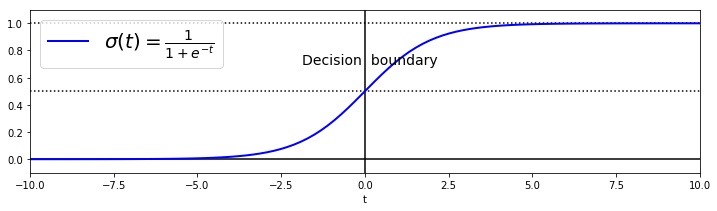

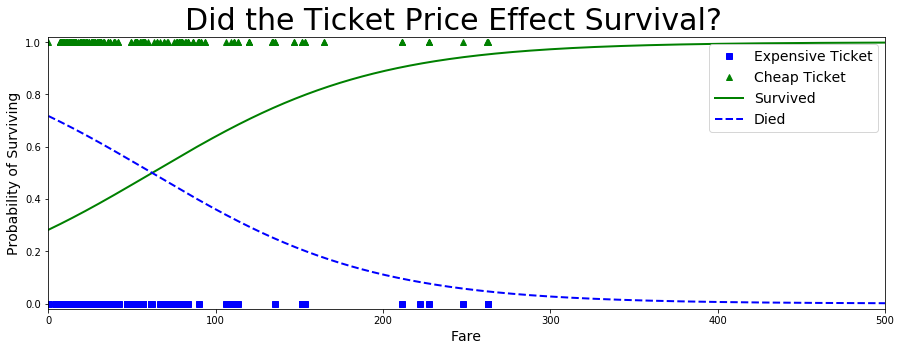

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')
data.describe()


print('There is a mean of {}, and a median of {}. Which would be the most appropriate for this dataset?'.format(
    data['Age'].mean(), data.Age.median()))

data['Age'].fillna(data.Age.mean(), inplace=True) #inplace = True let's you fill the data inplace


data.info() #We can see that there are 5 object features, which means that they are most likely categorical.

def describe_categorical(X):
    """
    This will create a table for looking at the categorical variables based on the dtype
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))
    
describe_categorical(data)

'''Let's fill the missing cabin numbers with a 0, then we can create a binary yes/no 
         that tells us if the person was wealthy enough to have a cabin.'''
data['Cabin'] = data.Cabin.fillna(0) #Filling the missing data points with 0s
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if x == 0 else 1) #switching the rest of the data points to a 1

'No we can do the same with Sex, just making one sex a 1 and the other a 0, we will make male 0 and female 1'
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

data.head(20) #We can see that Sex and Cabin are numbers instead of words and letters now.

data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)

data.head(20)

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.text(0.15, 0.7, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#test_size=0.2 will set aside 20% of our data for testing

from sklearn.linear_model import LogisticRegression #Importing the library

log_reg = LogisticRegression() #Instantiating the model

log_reg.fit(X_train, y_train) #Training the model on the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

log_reg.score(X_test, y_test)

log_reg_1_feature = LogisticRegression().fit(X.Fare.reshape(-1,1), y)

X_new = np.linspace(0, 512, 1000).reshape(-1, 1)
y_proba = log_reg_1_feature.predict_proba(X_new)

plt.figure(figsize=(15, 5))
plt.plot(X.Fare.reshape(-1,1)[y==0], y[y==0], "bs", label='Expensive Ticket')
plt.plot(X.Fare.reshape(-1,1)[y==1], y[y==1], "g^", label='Cheap Ticket')

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Survived")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Died")

plt.xlabel("Fare", fontsize=14)
plt.ylabel("Probability of Surviving", fontsize=14)

plt.figtext(.5,.9,'Did the Ticket Price Effect Survival?', fontsize=30, ha='center')
plt.legend(loc="top right", fontsize=14)
plt.axis([-0.2, 500, -0.02, 1.02])

plt.show()

There is a mean of 29.69911764705882, and a median of 28.0. Which would be the most appropriate for this dataset?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Daly, Mr. Peter Denis",male,347082,G6,S
freq,1,577,7,4,644


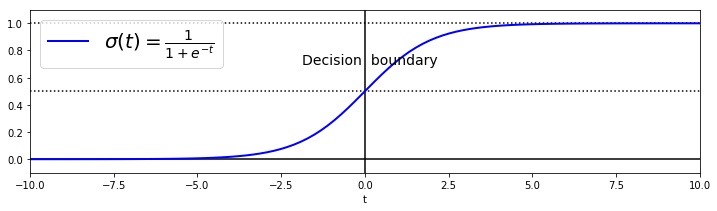

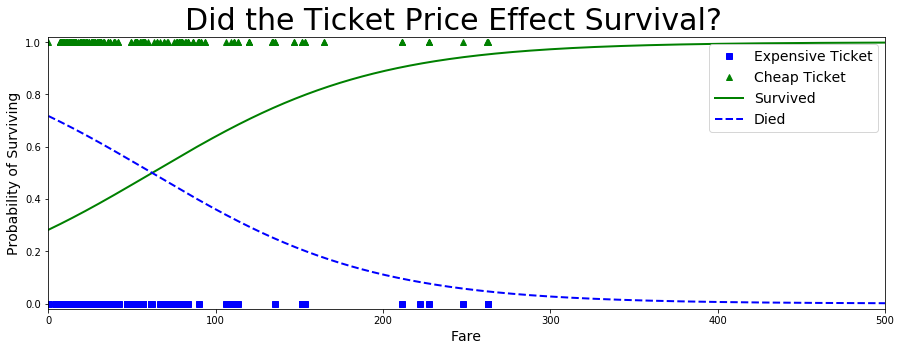

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')
data.describe()


print('There is a mean of {}, and a median of {}. Which would be the most appropriate for this dataset?'.format(
    data['Age'].mean(), data.Age.median()))

data['Age'].fillna(data.Age.mean(), inplace=True) #inplace = True let's you fill the data inplace


data.info() #We can see that there are 5 object features, which means that they are most likely categorical.

def describe_categorical(X):
    """
    This will create a table for looking at the categorical variables based on the dtype
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))
    
describe_categorical(data)

'''Let's fill the missing cabin numbers with a 0, then we can create a binary yes/no 
         that tells us if the person was wealthy enough to have a cabin.'''
data['Cabin'] = data.Cabin.fillna(0) #Filling the missing data points with 0s
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if x == 0 else 1) #switching the rest of the data points to a 1

'No we can do the same with Sex, just making one sex a 1 and the other a 0, we will make male 0 and female 1'
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

data.head(20) #We can see that Sex and Cabin are numbers instead of words and letters now.

data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)

data.head(20)

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.text(0.15, 0.7, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#test_size=0.2 will set aside 20% of our data for testing

from sklearn.linear_model import LogisticRegression #Importing the library

log_reg = LogisticRegression() #Instantiating the model

log_reg.fit(X_train, y_train) #Training the model on the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

log_reg.score(X_test, y_test)

log_reg_1_feature = LogisticRegression().fit(X.Fare.reshape(-1,1), y)

X_new = np.linspace(0, 512, 1000).reshape(-1, 1)
y_proba = log_reg_1_feature.predict_proba(X_new)

plt.figure(figsize=(15, 5))
plt.plot(X.Fare.reshape(-1,1)[y==0], y[y==0], "bs", label='Expensive Ticket')
plt.plot(X.Fare.reshape(-1,1)[y==1], y[y==1], "g^", label='Cheap Ticket')

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Survived")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Died")

plt.xlabel("Fare", fontsize=14)
plt.ylabel("Probability of Surviving", fontsize=14)

plt.figtext(.5,.9,'Did the Ticket Price Effect Survival?', fontsize=30, ha='center')
plt.legend(loc="top right", fontsize=14)
plt.axis([-0.2, 500, -0.02, 1.02])

plt.show()

In [5]:
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.228956
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
data.count()

Pclass    891
Sex       891
Age       891
SibSp     891
Parch     891
Fare      891
Cabin     891
dtype: int64

In [7]:
data.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,3,0,35.000000,0,0,8.0500,0
5,3,0,29.699118,0,0,8.4583,0
6,1,0,54.000000,0,0,51.8625,1
7,3,0,2.000000,3,1,21.0750,0
8,3,1,27.000000,0,2,11.1333,0
9,2,1,14.000000,1,0,30.0708,0


In [8]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, random_state=0)
clf = LinearSVC(random_state=0)
x=X.pop('Sex')
clf.fit(X, y)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
print(clf.coef_)
#[[ 0.08551385  0.39414796  0.49847831  0.37513797]]
print(clf.intercept_)
#[ 0.28418066]
print(clf.predict([[0]]))
#[1]

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [9]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, random_state=0)
clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
print(clf.coef_)
#[[ 0.08551385  0.39414796  0.49847831  0.37513797]]
print(clf.intercept_)
#[ 0.28418066]
print(clf.predict([[0]]))
#[1]

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [10]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

data.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)
X = data
X, y = make_classification(n_features=1, random_state=0)
clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
print(clf.coef_)
#[[ 0.08551385  0.39414796  0.49847831  0.37513797]]
print(clf.intercept_)
#[ 0.28418066]
print(clf.predict([[0]]))
#[1]

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [11]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

data.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)
X = data
X, y = make_classification(n_features=1, random_state=0)
clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
print(clf.coef_)
#[[ 0.08551385  0.39414796  0.49847831  0.37513797]]
print(clf.intercept_)
#[ 0.28418066]
print(clf.predict([[0]]))
#[1]

ValueError: labels ['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Cabin'] not contained in axis

In [12]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

data.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=0, inplace=True)
X = data
X, y = make_classification(n_features=1, random_state=0)
clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
print(clf.coef_)
#[[ 0.08551385  0.39414796  0.49847831  0.37513797]]
print(clf.intercept_)
#[ 0.28418066]
print(clf.predict([[0]]))
#[1]

ValueError: labels ['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Cabin'] not contained in axis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)

data.head(20)

X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

X.head()

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

X, y = make_classification(n_features=1, random_state=0)
clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
print(clf.coef_)
#[[ 0.08551385  0.39414796  0.49847831  0.37513797]]
print(clf.intercept_)
#[ 0.28418066]
print(clf.predict([[0]]))
#[1]

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)

data.head(20)

X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

X.head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)

data.head(20)

X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

X.head()

from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)
print(clf.predict([[0]]))
print(clf.predict([[1]]))

[0]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)

data.head(20)

X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

X.head()

from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)
print(clf.predict([[0]]))
print(clf.predict([[1]]))

[0]
[1]
